In [1]:
#Install sep
!pip install sep



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.1 MB/s eta 0:00:00


In [2]:
#Import necessary libraries
import numpy as np
import sep

In [3]:
# additional setup for reading the test image and displaying plots
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

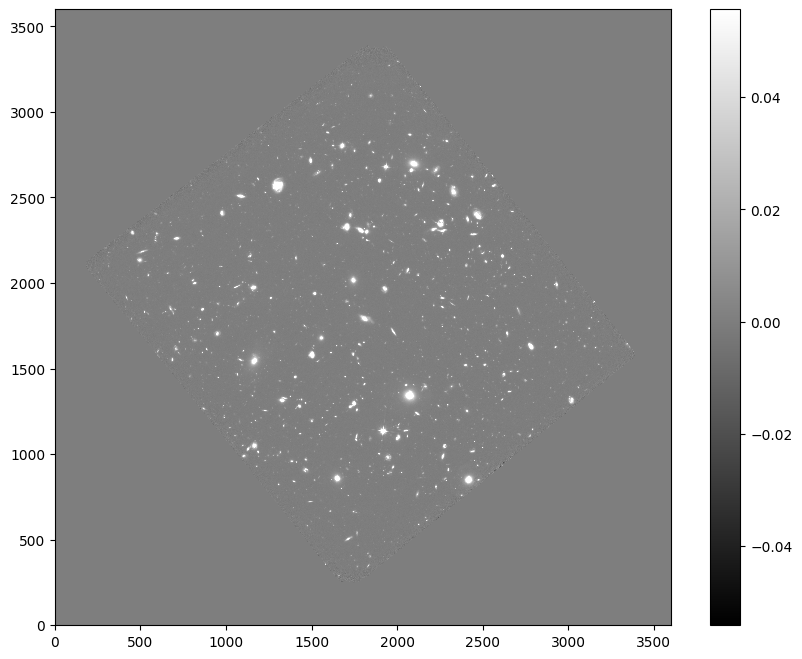

In [4]:
# read image into standard 2-d numpy array
data = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig("FImageB-1",bbox_inches="tight",facecolor="chartreuse")

In [5]:
# measure a spatially varying background on the image
data = data.byteswap(inplace=True).newbyteorder()
bkg = sep.Background(data)


0.0
0.0005398219218477607


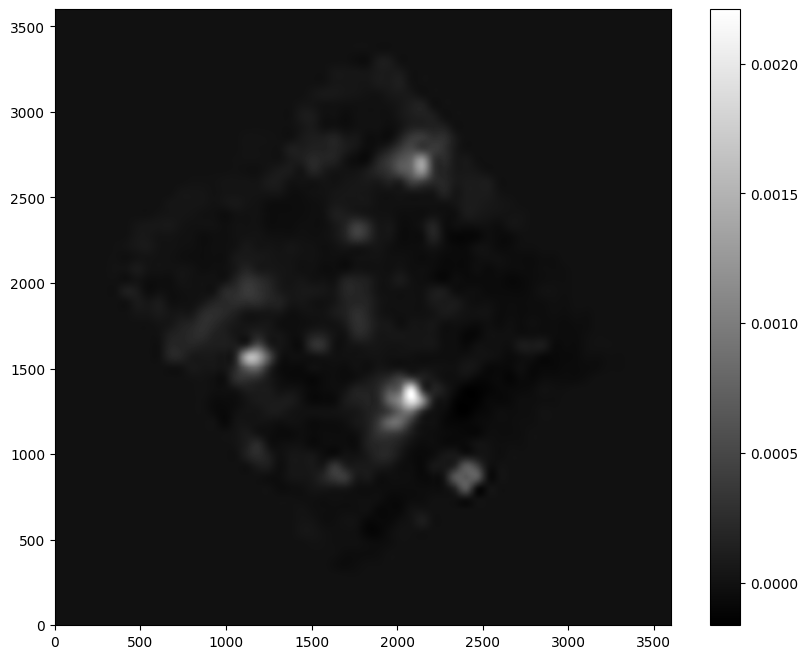

In [6]:
bkg = sep.Background(data)

# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)


# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("FImageB-2",bbox_inches="tight",facecolor="palevioletred")

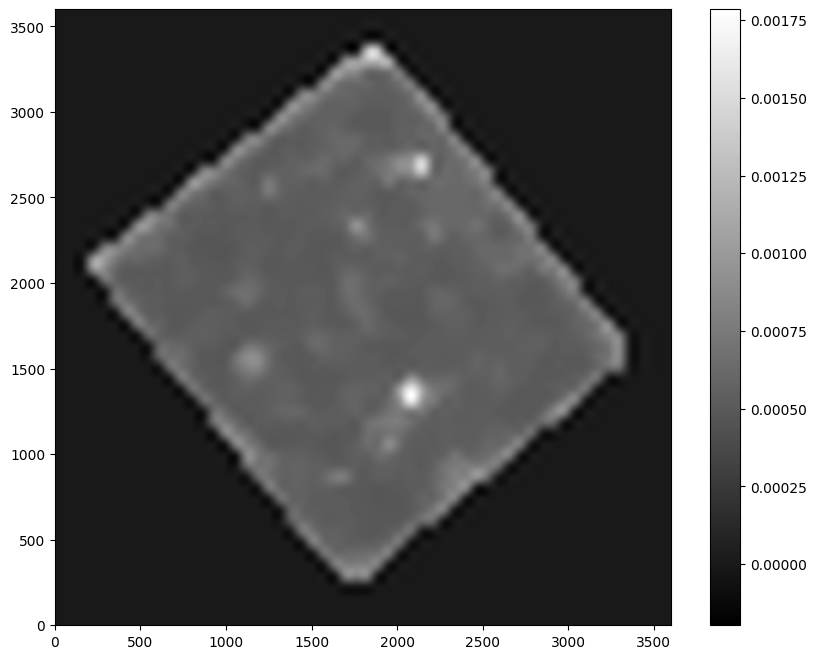

In [7]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("FImageB-3",bbox_inches="tight",facecolor="r")

There are 8643
object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


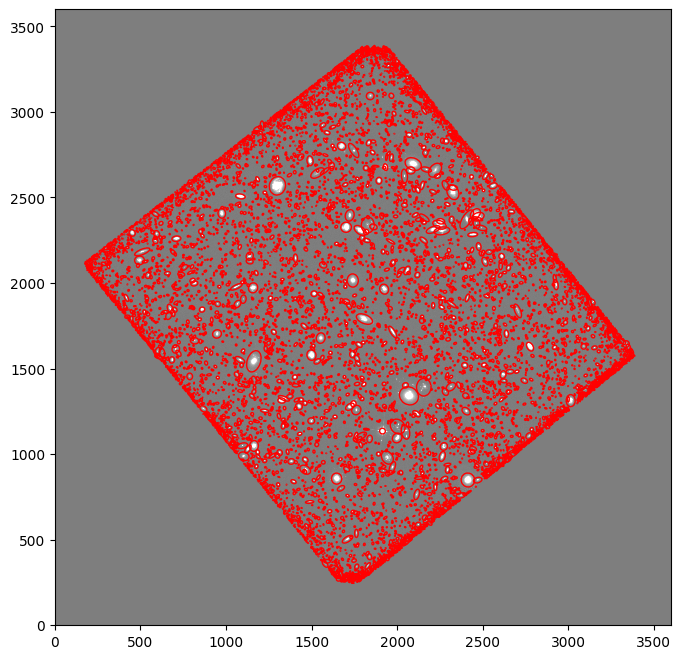

In [8]:

# subtract the background
data_sub = data - bkg

objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# how many objects were detected
len(objects)

#print number of objects
print(f'There are {len(objects)}')


from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

# available fields
objects.dtype.names

flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

plt.savefig("FImageB-4",bbox_inches="tight",facecolor="teal")



<ipython-input-13-6498705f18b6>:1: RuntimeWarning: invalid value encountered in log10
  Lflux=np.log10(flux)


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0., 

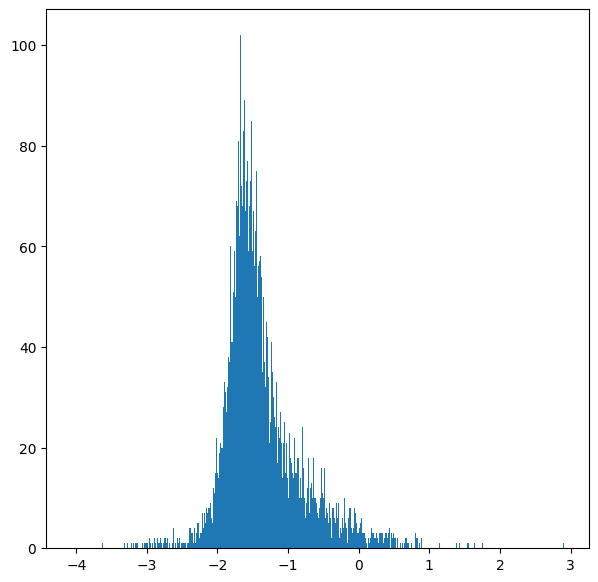

In [13]:
Lflux=np.log10(flux)
f,ax = plt.subplots(1,1, figsize=(7,7))
ax.hist(Lflux, bins=1000)

In [10]:
mean,std,median=np.mean(data),np.std(data),np.median(data)
print(f"mean:{mean}.std:{std}.median")

mean:0.0007912990404292941.std:0.05486845225095749.median


807.2972835731507
14713.308999162127


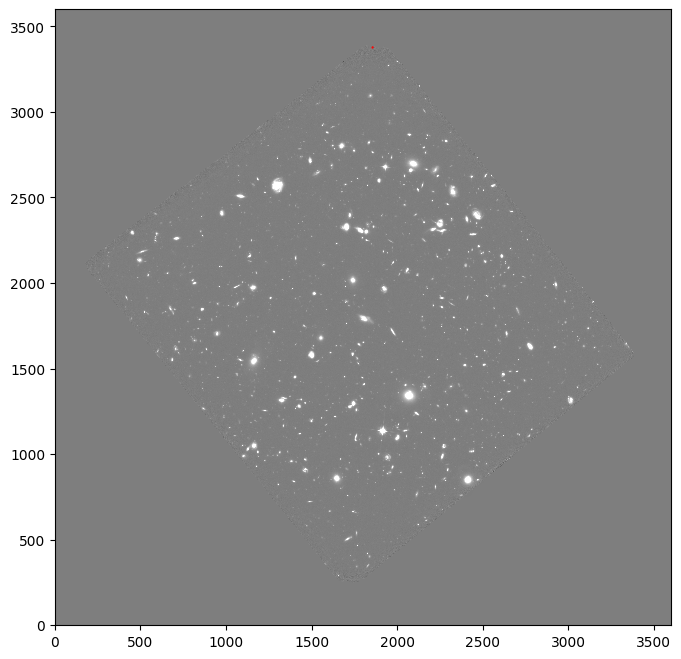

In [11]:
flux_sort=np.sort(flux)
print(flux_sort[-1])

n_stds=(flux_sort[-1]-mean)/std
print(n_stds)

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')
for i in range(8642,8643):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

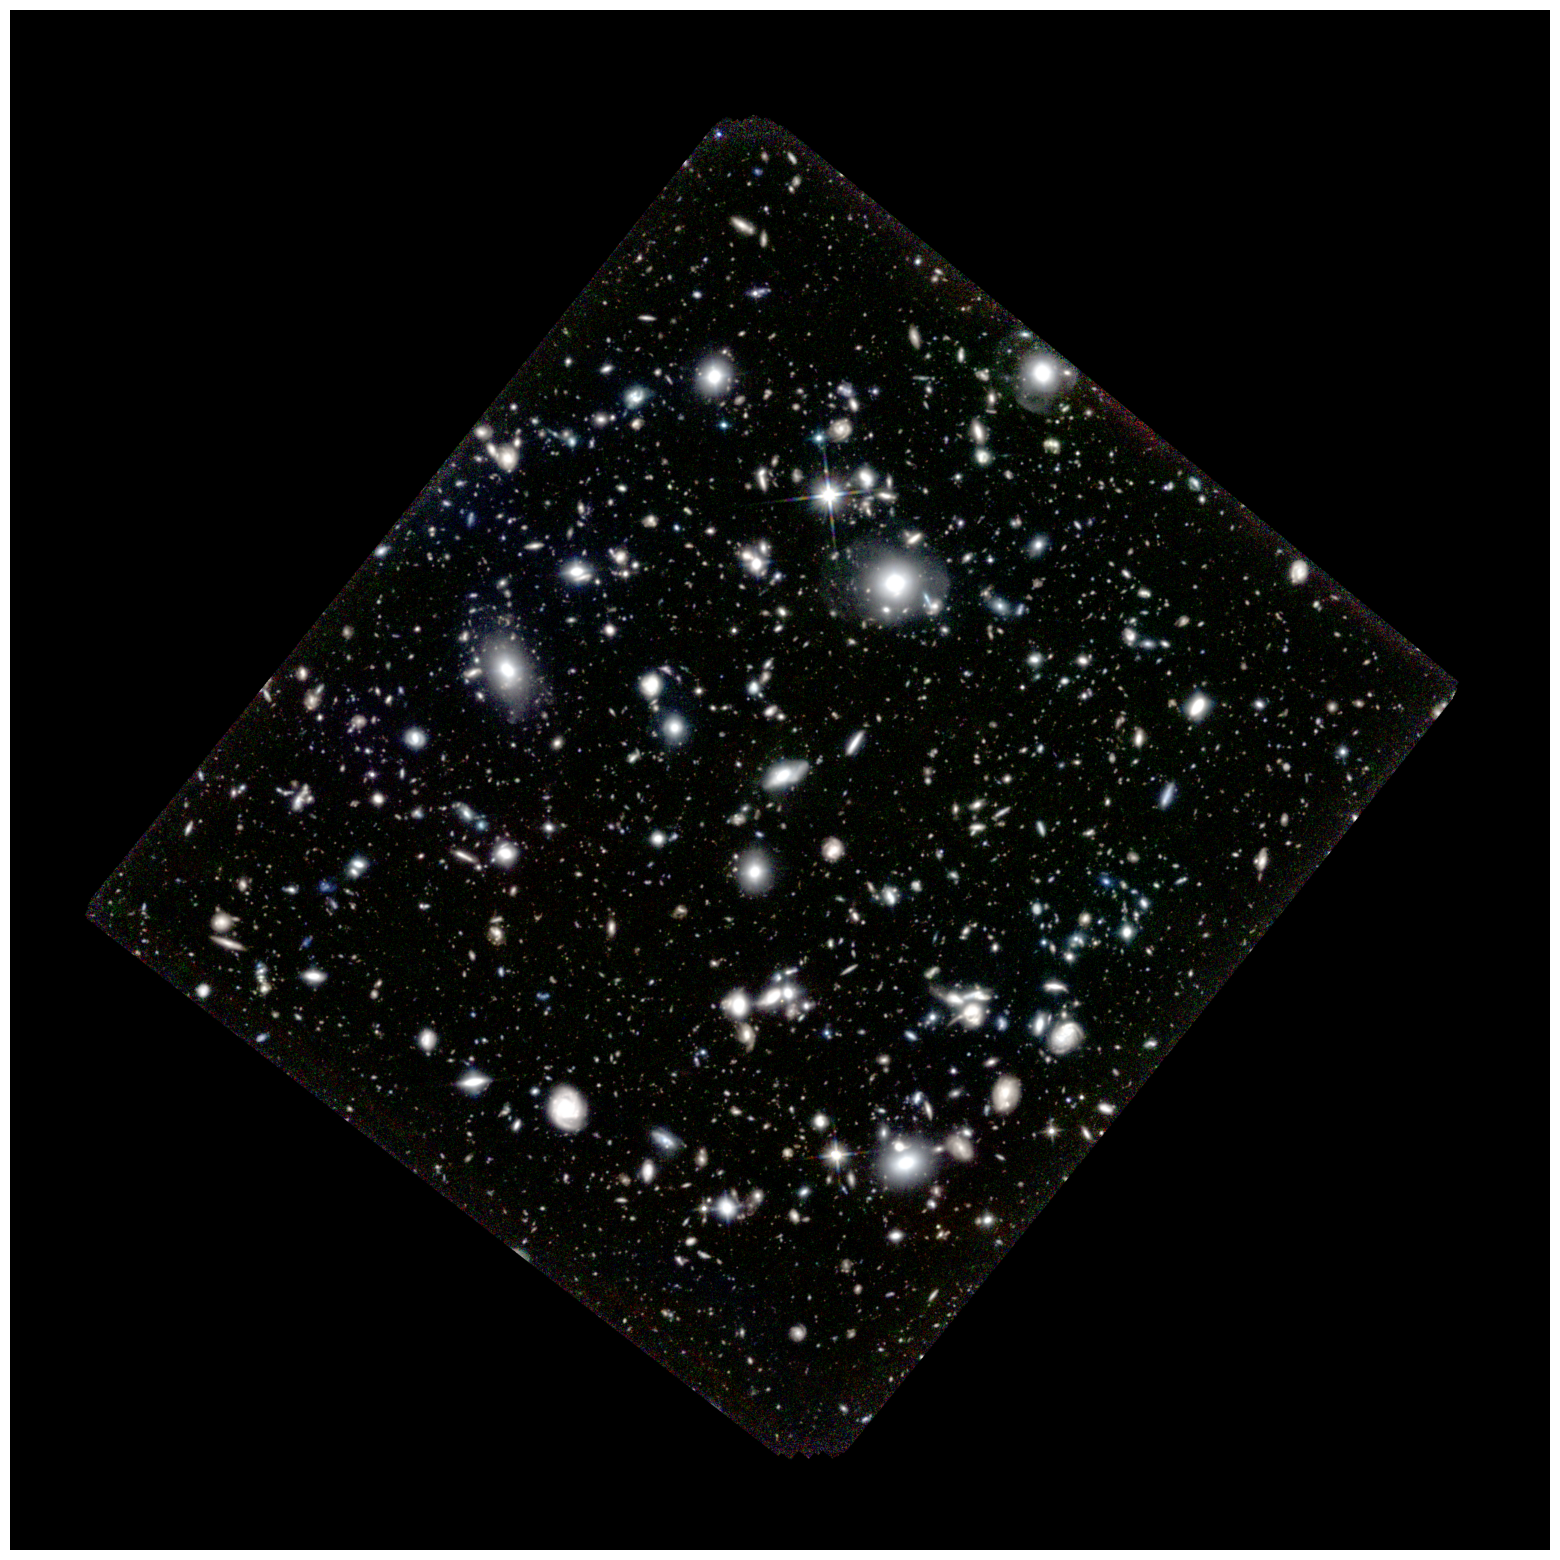

In [12]:
fdata_F105W="hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
fdata_F125W="hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
fdata_F160W="hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

hdu_2=fits.open(fdata_F105W)
hdu_3=fits.open(fdata_F125W)
hdu_4=fits.open(fdata_F160W)

data_2=hdu_2[0].data
data_3=hdu_3[0].data
data_4=hdu_4[0].data

def rescale_image(data):
    pdata_tmp=data.copy()
    m=np.nanmean(pdata_tmp)
    vplmin=m/2.
    vpmin=np.log10(vplmin)
    vpmax=np.log10(m*100.)
    pdata_tmp[pdata_tmp<vplmin]=vplmin
    pdata_tmp=np.log10(pdata_tmp)
    return pdata_tmp,vpmin,vpmax

data_2_res, d2min,d2max=rescale_image(data_2)
data_3_res, d3min,d3max=rescale_image(data_3)
data_4_res, d4min,d4max=rescale_image(data_4)

data_2_res[data_2_res<d2min]=d2min
data_2_res[data_2_res>d2max]=d2max
data_3_res[data_3_res<d3min]=d3min
data_3_res[data_3_res>d3max]=d3max
data_4_res[data_4_res<d4min]=d4min
data_4_res[data_4_res>d4max]=d4max

rgb=np.zeros((data_2_res.shape[0],data_2_res.shape[1],3))
rgb[:,:,0]=(data_2_res-d2min)/(d2max-d2min)
rgb[:,:,1]=(data_3_res-d3min)/(d3max-d3min)
rgb[:,:,2]=(data_4_res-d4min)/(d4max-d4min)

f,ax=plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb)
plt.savefig('FinalRBG.png', bbox_inches='tight',pad_inches=0,dpi=600)